# Algoritmos de Regresion

In [1]:
#Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

print('¡Librerías importadas con éxito!')

¡Librerías importadas con éxito!


In [2]:
#Abrimos los archivos con el Train 
train = pd.read_csv('trainset.csv')
train = train.set_index('id')
train.head()

,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,popularity,ClasePopularidad
id,,,,,,,,,,,,,
146790,2.217079,0.0,139.731754,0.869118,0.519249,0.029225,0.319573,0.002967,0.091678,0.188732,26.457350,34.0,2
142735,4.304625,0.0,140.968235,1.910310,0.769341,0.067253,0.023262,0.000000,0.052209,0.663667,23.141670,2.0,1
971,4.304625,1.0,109.520199,0.977668,0.253525,0.026992,0.364818,0.001985,0.074177,0.444230,29.855429,62.0,4
61341,3.828397,1.0,75.954996,1.509001,0.931646,0.106186,0.139922,0.000000,0.120665,0.491329,31.462427,19.0,1
153359,3.828397,1.0,91.244236,1.555391,0.545826,0.035371,0.251469,0.149262,0.083623,0.272233,34.090480,43.0,3


In [3]:
train.shape

(55543, 13)

In [4]:
train.isnull().sum()

t_key0              0
t_mode0             0
t_dur0              0
t_dance0            0
t_energy0           0
t_speech0           0
t_acous0            0
t_ins0              0
t_live0             0
t_val0              0
t_tempo0            0
popularity          0
ClasePopularidad    0
dtype: int64

In [5]:
test = pd.read_csv('testset.csv')
test = test.set_index('id')
test.head()

,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,popularity,ClasePopularidad
id,,,,,,,,,,,,,
116295,3.873489,1.0,102.077434,1.136005,0.652068,0.038806,0.245297,0.000004,0.061371,0.313870,20.325737,56.0,3
101223,1.595405,1.0,163.222452,1.559666,1.375892,0.090603,0.000999,0.144474,0.079899,0.237952,32.519312,22.0,2
47928,4.359420,1.0,113.531853,1.593801,1.504156,0.052763,0.030623,0.005559,0.070192,0.776168,26.369467,22.0,2
88722,3.873489,1.0,96.792061,1.289259,1.595320,0.048714,0.151174,0.000000,0.034878,0.862629,32.618254,50.0,3
111363,4.359420,0.0,102.640817,1.814995,1.031562,0.036711,0.015053,0.000002,0.089617,0.838169,25.157347,35.0,2


In [6]:
test.shape

(13920, 13)

In [7]:
#Verificamos que no hay valores nulos 
test.isnull().sum()

t_key0              0
t_mode0             0
t_dur0              0
t_dance0            0
t_energy0           0
t_speech0           0
t_acous0            0
t_ins0              0
t_live0             0
t_val0              0
t_tempo0            0
popularity          0
ClasePopularidad    0
dtype: int64

**Entrenamiento como Problema de Regresion**

En este caso nuestro target es la variable **popularity** que toma valores del 1 al 100


In [8]:
'''Dividimos el Train data set en Atributos y Target'''

X_train = train.drop(['popularity','ClasePopularidad'],axis = 1)
y_train = train['popularity']

In [9]:
'''Dividimos el Test Set en Atributos y Target'''

X_test = test.drop(['popularity','ClasePopularidad'],axis = 1)
y_test = test['popularity']

## 1 - Regresion Lineal

In [10]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [11]:
ypred = linear_model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, ypred)
MAE = mean_absolute_error(y_test, ypred)
MSE = mean_squared_error(y_test, ypred)

print(f'Para la regresion lineal el absolute error es {MAE}, el mean squared error es de {MSE} y el r2 es de {r2}')


Para la regresion lineal el absolute error es 15.065902435483522, el mean squared error es de 327.4506756189727 y el r2 es de 0.04448804339697976


## 2 - Regresion Polinomica

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)  #para empezar comenzaremos con un polinomio de segundo grado
poly_features = poly.fit_transform(X_train) #Transformamos nuestros features (nos devuelve las x2)

poly_model = LinearRegression()
poly_model.fit(poly_features,y_train)

LinearRegression()

In [14]:
#ransformamos el X test
poly_featuresTest = poly.fit_transform(X_test) #Transformamos nuestros features (nos devuelve las x2)

ypredpoly = poly_model.predict(poly_featuresTest)

In [15]:
r2poly = r2_score(y_test, ypredpoly)
MAEpoly = mean_absolute_error(y_test, ypredpoly)
MSEpoly = mean_squared_error(y_test, ypredpoly)

print(f'Para la regresion polinomica grado 2 el absolute error es {MAEpoly}, el mean squared error es de {MSEpoly} y el r2 es de {r2poly}')

Para la regresion polinomica grado 2 el absolute error es 14.724282205571154, el mean squared error es de 316.51987063479896 y el r2 es de 0.07638449570366945


In [16]:
'''Hacemos un loop para poder probar con diferentes valores grado de polinomio'''


degree = np.arange(2,6) #Probaremos con polinomios de grados 2 al 5
MAEs = []
rs = []


for i in degree:
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(X_train)
    poly_model = LinearRegression()
    poly_model.fit(poly_features,y_train)
    
    poly_featuresTest = poly.fit_transform(X_test)
    ypredpoly = poly_model.predict(poly_featuresTest)
    
    r = r2_score(y_test, ypredpoly)
    M = mean_absolute_error(y_test, ypredpoly)
    MAEs.append(M)
    rs.append(r)


In [17]:
rs

[0.07638449570366945,
 0.08125732570310784,
 0.07174588255596259,
 -0.0029108952065213245]

In [18]:
R = [r2,rs[0],rs[1],rs[2],rs[3]]
R

[0.04448804339697976,
 0.07638449570366945,
 0.08125732570310784,
 0.07174588255596259,
 -0.0029108952065213245]

In [19]:
d = np.arange(1,6)
d

array([1, 2, 3, 4, 5])

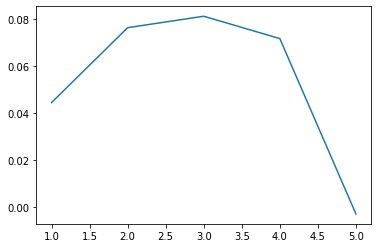

In [20]:
'''Hacemos un grafico sencillo para ver evaluar el resultado'''
plt.plot(d, R)

**Observaciones**

EL mejor resultado se obtiene con un polinomio de grado 3, con un R2 de 0.081

## 3 - LASSO

In [31]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(random_state = 13)
lasso_model.fit(X_train,y_train)

Lasso(random_state=13)

In [32]:
ypredLasso = lasso_model.predict(X_test)

In [33]:
r2Lasso = r2_score(y_test, ypredLasso)
MAELasso = mean_absolute_error(y_test, ypredLasso)
MSELasso = mean_squared_error(y_test, ypredLasso)

print(f'Para este arbol de decision el absolute error es {MAELasso}, el mean squared error es de {MSELasso} y el r2 es de {r2Lasso}')


Para este arbol de decision el absolute error es 15.449091919429831, el mean squared error es de 340.97952217071224 y el r2 es de 0.005010419431785262


## 4 - Random Forest Regresor

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 25,random_state = 13)
rf_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=25, random_state=13)

In [35]:
ypredrf = rf_model.predict(X_test)

In [36]:
r2rf = r2_score(y_test, ypredrf)
MAErf = mean_absolute_error(y_test, ypredrf)
MSErf = mean_squared_error(y_test, ypredrf)

print(f'Para el Random Forest Regresor el absolute error es {MAErf}, el mean squared error es de {MSErf} y el r2 es de {r2rf}')


Para el Random Forest Regresor el absolute error es 14.700034830550992, el mean squared error es de 320.89826646292266 y el r2 es de 0.06360819113014915


In [40]:
'''haremos un loop para calcular Accuracies a diferentes valore de n_estimator'''

estimators = np.arange(10,150,10)
MAEForest = []
rForest = []

for i in estimators:
    rf_model = RandomForestRegressor(n_estimators = i,random_state = 13)
    rf_model.fit(X_train,y_train)
    ypredrf = rf_model.predict(X_test)
    
    r2rf = r2_score(y_test, ypredrf)
    MAErf = mean_absolute_error(y_test, ypredrf)
    rForest.append(r2rf)
    MAEForest.append(MAErf)
    


In [41]:
rForest

[0.015364511930720193,
 0.055200765969696586,
 0.070468161502382,
 0.07803315766480534,
 0.08144753542500993,
 0.08649034005842893,
 0.08921483519440421,
 0.09079756175443432,
 0.0929864093705679,
 0.0937160905088944,
 0.09530609304402016,
 0.09567814128787122,
 0.09638808000034893,
 0.09740498108150375]

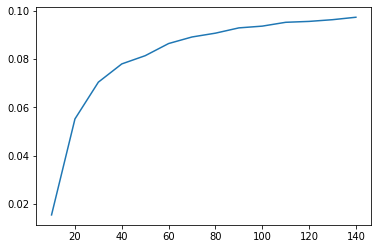

In [42]:
plt.plot(estimators, rForest)


## Dummy

In [44]:
test['popularity'].value_counts()

1.0     314
31.0    273
29.0    272
32.0    267
19.0    262
       ... 
86.0      2
95.0      1
89.0      1
85.0      1
98.0      1
Name: popularity, Length: 89, dtype: int64

In [45]:
test['popularity'].mean()

31.37155172413793

In [46]:
moda = test['popularity'].mean()
y_Dummy = test['popularity'].apply(lambda x: moda)
y_Dummy

id
116295    31.371552
101223    31.371552
47928     31.371552
88722     31.371552
111363    31.371552
            ...    
159895    31.371552
37399     31.371552
139733    31.371552
136482    31.371552
103656    31.371552
Name: popularity, Length: 13920, dtype: float64

In [48]:
r2Dummy = r2_score(y_test, y_Dummy)
MAEDummy = mean_absolute_error(y_test, y_Dummy)
MSEDummy = mean_squared_error(y_test, y_Dummy)

print(f'La regresion Dummy tiene absolute error es {MAEDummy}, el mean squared error es de {MSEDummy} y el r2 es de {r2Dummy}')

La regresion Dummy tiene absolute error es 15.49096574019025, el mean squared error es de 342.6965757530717 y el r2 es de 0.0


## Resumen

In [49]:
Resumen = pd.DataFrame([[0.081,'3er grado'],[0.005,'no aplica'],[0.097,'estimadores = 140']],index = ['Regresion Polinomica','Lasso','Random Forest'], columns = ['R2','Parametro'])

In [50]:
Resumen

,R2,Parametro
Regresion Polinomica,0.081,3er grado
Lasso,0.005,no aplica
Random Forest,0.097,estimadores = 140
